In [1]:
import torch
torch.set_default_tensor_type('torch.cuda.FloatTensor')

# Loading MNIST:

In [2]:
import torchvision as tv
mnist_train=tv.datasets.MNIST(root='./Data',train=True,download=True)
mnist_test=tv.datasets.MNIST(root='./Data',train=False,download=True)

In [3]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./Data
    Transforms (if any): None
    Target Transforms (if any): None

In [4]:
mnist_train[1]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FDB35ABF1D0>,
 tensor(0, device='cpu'))

In [5]:
from PIL import Image
mnist_train[1][0].show()
print(mnist_train[1][1])

tensor(0, device='cpu')


# Tranforming in tensors and grayscale from 0 to 1:

In [6]:
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.Grayscale(num_output_channels=1),transforms.ToTensor()])

In [7]:
import torchvision as tv
mnist_train=tv.datasets.MNIST(root='./Data',train=True,download=True,transform=transform)
mnist_test=tv.datasets.MNIST(root='./Data',train=False,download=True,transform=transform)

In [8]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./Data
    Transforms (if any): Compose(
                             Grayscale(num_output_channels=1)
                             ToTensor()
                         )
    Target Transforms (if any): None

In [9]:
mnist_test

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ./Data
    Transforms (if any): Compose(
                             Grayscale(num_output_channels=1)
                             ToTensor()
                         )
    Target Transforms (if any): None

# Image 0:

In [10]:
mnist_train[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [11]:
mnist_train[0][0].size()

torch.Size([1, 28, 28])

In [12]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./Data
    Transforms (if any): Compose(
                             Grayscale(num_output_channels=1)
                             ToTensor()
                         )
    Target Transforms (if any): None

In [13]:
to_pil = tv.transforms.ToPILImage()
img = to_pil(mnist_train[0][0])
img

Label:

In [14]:
mnist_train[0][1].cuda()

tensor(5)

28x28 images

# X matrix creation

In [15]:
X=[]
temp=[]
temp2=[1]
temp2=torch.FloatTensor(temp2)
for i in list(range(60000)):
    temp=mnist_train[i][0]
    temp=temp.view(-1,784)
    temp=torch.squeeze(temp)
    #temp=torch.cat((temp2,temp))#add bias col
    X.append(temp)
X=torch.stack(X)

In [16]:
X

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cpu')

In [17]:
X.size()

torch.Size([60000, 784])

# Y Matrix creation

In [18]:
def OneHotOriginal(tensor):
    #classes from 0 to 9
    label=tensor.item()
    if (label==0):
        out=[1,0,0,0,0,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==1):
        out=[0,1,0,0,0,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==2):
        out=[0,0,1,0,0,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==3):
        out=[0,0,0,1,0,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==4):
        out=[0,0,0,0,1,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==5):
        out=[0,0,0,0,0,1,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==6):
        out=[0,0,0,0,0,0,1,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==7):
        out=[0,0,0,0,0,0,0,1,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==8):
        out=[0,0,0,0,0,0,0,0,1,0]
        out=torch.FloatTensor(out)
        return out
    if (label==9):
        out=[0,0,0,0,0,0,0,0,0,1]
        out=torch.FloatTensor(out)
        return out
    else:
        print('Error: label out of range')
    

In [19]:
def OneHot(tensor):
    #classes from 0 to 9
    label=tensor.item()
    if (label==0):
        out=[0,0,0,0,0,0,0,0,0,1]
        out=torch.FloatTensor(out)
        return out
    if (label==1):
        out=[1,0,0,0,0,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==2):
        out=[0,1,0,0,0,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==3):
        out=[0,0,1,0,0,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==4):
        out=[0,0,0,1,0,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==5):
        out=[0,0,0,0,1,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==6):
        out=[0,0,0,0,0,1,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==7):
        out=[0,0,0,0,0,0,1,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==8):
        out=[0,0,0,0,0,0,0,1,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==9):
        out=[0,0,0,0,0,0,0,0,1,0]
        out=torch.FloatTensor(out)
        return out
    else:
        print('Error: label out of range')
    

In [20]:
test=OneHot(mnist_train[0][1])
print(test)

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], device='cpu')


In [21]:
test.size()

torch.Size([10])

In [22]:
Y=[]
temp=[]
for i in list(range(60000)):
    temp=mnist_train[i][1]
    temp=OneHot(temp)
    Y.append(temp)
Y=torch.stack(Y)

In [23]:
Y.size()

torch.Size([60000, 10])

In [24]:
Y[0]

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], device='cpu')

# Validation and training matrices

In [25]:
rand=list(range(60000))
import random as R
R.shuffle(rand)

In [26]:
TrainingIndexes=rand[:40000]
ValidatingIndexes=rand[40000:]

In [27]:
Xtrain=[]
for i in TrainingIndexes:
    Xtrain.append(X[i])
Xtrain=torch.stack(Xtrain)

Xval=[]
for i in ValidatingIndexes:
    Xval.append(X[i])
Xval=torch.stack(Xval)

Ytrain=[]
for i in TrainingIndexes:
    Ytrain.append(Y[i])
Ytrain=torch.stack(Ytrain)

Yval=[]
for i in ValidatingIndexes:
    Yval.append(Y[i])
Yval=torch.stack(Yval)

In [28]:
print(Xtrain.size(),Ytrain.size(),Xval.size(),Yval.size())

torch.Size([40000, 784]) torch.Size([40000, 10]) torch.Size([20000, 784]) torch.Size([20000, 10])


# Testing Matrices

In [29]:
Xtest=[]
temp=[]
temp2=[1]
temp2=torch.FloatTensor(temp2)
for i in list(range(10000)):
    temp=mnist_test[i][0]
    temp=temp.view(-1,784)
    temp=torch.squeeze(temp)
    #temp=torch.cat((temp2,temp))#add bias col
    Xtest.append(temp)
Xtest=torch.stack(Xtest)

In [30]:
Xtest.size()

torch.Size([10000, 784])

In [31]:
Ytest=[]
temp=[]
for i in list(range(10000)):
    temp=mnist_test[i][1]
    temp=OneHot(temp)
    Ytest.append(temp)
Ytest=torch.stack(Ytest)

In [32]:
Ytest.size()

torch.Size([10000, 10])

# Network definition and training

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as f
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__() #invoca o init de nn.Module
        self.lin1=nn.Linear(784,500)
        tensor=torch.empty(500,784)
        tensor=nn.init.normal_(tensor, mean=0, std=0.2)
        self.lin1.weight=nn.Parameter(tensor)
        tensor=torch.empty(500)
        tensor=nn.init.normal_(tensor, mean=0, std=0.2)
        self.lin1.bias=nn.Parameter(tensor)
        #self.lin2=nn.Linear(500,10)
    def forward(self,x):
        #x=x.view(-1,784)
        x=f.relu(self.lin1(x))
        #x=self.lin2(x)
        return x
    def num_flat_features(self, x): 
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features        

In [34]:
net=Network()
print(net.lin1.bias.size()) 


torch.Size([500])


In [35]:
L=[pow(2,-10),pow(2,-8),pow(2,-6),pow(2,-4),pow(2,-2),pow(2,0),pow(2,2),pow(2,4),pow(2,6),pow(2,8),pow(2,10)]
AllW=[]
H=net(Xtrain.cuda())
for l in L:
    W=[]#weights
    Ht=H.t()#transpose
    W=torch.mm(Ht,H)# Ht*H
    temp=torch.eye(500)*l 
    W=W.cuda()+temp # Ht*H+I*l
    W=torch.inverse(W) # (Ht*H+I*l)^(-1)
    W=torch.mm(W,Ht.cuda()) # ((Ht*H+I*l)^(-1))*Ht
    W=torch.mm(W,Ytrain.cuda()) # ((Ht*H+I*l)^(-1))*Ht*y
    AllW.append(W)

In [36]:
AllW[1].size()

torch.Size([500, 10])

In [37]:
#AllW

## Validation:

In [38]:
def error(w,h,y):
    w=w.cuda()
    h=h.cuda()
    y=y.cuda()
    err=torch.mm(h.cuda(),w)
    err=err-y
    #print(err.size())
    err=torch.norm(err)
    #print(err.size())
    err=err.item()
    err=pow(err,2)
    return err


In [39]:
errors=[]
Hval=net(Xval.cuda())
for weight in AllW:
    err=error(weight,Hval,Yval)
    print(err)
    errors.append(err)
import numpy as np
from numpy import ndarray as nd
errors=np.asarray(errors)
minimumError=nd.min(errors)
Bestl=L[nd.argmin(errors)]
print('minimum error:', minimumError, 'best regularization l:',Bestl)

5597.251484352688
5597.251484352688
5597.251484352688
5597.2469180217595
5597.23321904015
5597.177281705895
5596.977507793868
5596.382773425663
5595.378303453559
5598.95828098082
5645.90485431836
minimum error: 5595.378303453559 best regularization l: 64


# training with all training set and best regularization:

In [40]:
W=[]#weights
l=Bestl
H=net(X.cuda())
Ht=H.t()#transpose
W=torch.mm(Ht,H)# Ht*H
temp=torch.eye(500)*l 
W=W.cuda()+temp # Ht*H+I*l
W=torch.inverse(W) # (Ht*H+I*l)^(-1)
W=torch.mm(W,Ht.cuda()) # ((Ht*H+I*l)^(-1))*Ht
W=torch.mm(W,Y.cuda()) # ((Ht*H+I*l)^(-1))*Ht*y

# Testing

In [41]:
Htest=net(Xtest.cuda())
TestingError=error(W,Htest,Ytest)

In [42]:
print('Testing Error:',TestingError)

Testing Error: 2719.614701696264


# Accuracy

In [43]:
def TensorToOneHot(y):
    o=y.cpu()
    o=o.detach().numpy()
    maximum=nd.argmax(o)
    maximum=OneHotOriginal(maximum)
    maximum=maximum.cuda()
    return maximum

In [44]:
Out=torch.mm(Htest.cuda(),W)

In [45]:
Out.size()

torch.Size([10000, 10])

In [46]:
def Accuracy(output,labels):
    acc=0
    j=0
    for i in output:
        temp=TensorToOneHot(i)
        if (torch.min(temp.cuda()==labels[j].cuda()).item()==1):
            acc=acc+1
        j=j+1
    acc=acc/j
    return acc

In [47]:
acc=Accuracy(Out,Ytest)
print('test accuracy:',acc)

test accuracy: 0.9216


# best model by accuracy

In [48]:
allAcc=[]
Hval=net(Xval.cuda())
for weight in AllW:
    temp=torch.mm(Hval.cuda(),weight)
    accu=Accuracy(temp,Yval)
    print(accu)
    allAcc.append(accu)
allAcc=np.asarray(allAcc)
maximumAcc=nd.max(allAcc)
BestlByAcc=L[nd.argmax(allAcc)]
print('maximum Accuracy:', maximumAcc, 'best regularization l by accuracy:',BestlByAcc)

0.9185
0.9184
0.91845
0.9185
0.91845
0.91845
0.9185
0.9186
0.91855
0.91815
0.91545
maximum Accuracy: 0.9186 best regularization l by accuracy: 16


## training with all training set and best regularization by accuracy:

In [49]:
W=[]#weights
l=BestlByAcc
H=net(X.cuda())
Ht=H.t()#transpose
W=torch.mm(Ht,H)# Ht*H
temp=torch.eye(500)*l 
W=W.cuda()+temp # Ht*H+I*l
W=torch.inverse(W) # (Ht*H+I*l)^(-1)
W=torch.mm(W,Ht.cuda()) # ((Ht*H+I*l)^(-1))*Ht
W=torch.mm(W,Y.cuda()) # ((Ht*H+I*l)^(-1))*Ht*y

## Testing

In [50]:
OutAcc=torch.mm(Htest.cuda(),W)
accFinal=Accuracy(OutAcc,Ytest)
print('test accuracy with best model by accuracy:',accFinal)

test accuracy with best model by accuracy: 0.9215


# Saving Matrices

In [51]:
W

tensor([[-0.0053, -0.0208,  0.0180,  ..., -0.0177,  0.0032,  0.0148],
        [ 0.0163,  0.0140,  0.1179,  ...,  0.0214, -0.0031, -0.0200],
        [-0.0042, -0.0176, -0.0033,  ..., -0.0040,  0.0078,  0.0040],
        ...,
        [ 0.0272,  0.0112, -0.0109,  ..., -0.0105, -0.0324,  0.0014],
        [-0.0291, -0.0310,  0.0015,  ...,  0.0192, -0.0391, -0.0173],
        [ 0.0038, -0.0122,  0.0199,  ..., -0.0076,  0.0061,  0.0139]],
       grad_fn=<MmBackward>)

In [52]:
Wnp=W.cpu().detach().numpy()

In [53]:
Wnp

array([[-0.00532651, -0.0207772 ,  0.01797277, ..., -0.01768576,
         0.0031512 ,  0.01476913],
       [ 0.01628836,  0.0140356 ,  0.11790454, ...,  0.02139064,
        -0.00307755, -0.02003554],
       [-0.00422883, -0.01757086, -0.00325449, ..., -0.00398197,
         0.00777138,  0.0039985 ],
       ...,
       [ 0.02717428,  0.01124542, -0.01092042, ..., -0.0105301 ,
        -0.03238161,  0.00141609],
       [-0.02909062, -0.03097573,  0.00154212, ...,  0.0192457 ,
        -0.03911609, -0.01731533],
       [ 0.00383525, -0.01222298,  0.01989977, ..., -0.00757127,
         0.00605749,  0.01393348]], dtype=float32)

In [54]:
Wnp=np.matrix(Wnp)

In [55]:
Wnp

matrix([[-0.00532651, -0.0207772 ,  0.01797277, ..., -0.01768576,
          0.0031512 ,  0.01476913],
        [ 0.01628836,  0.0140356 ,  0.11790454, ...,  0.02139064,
         -0.00307755, -0.02003554],
        [-0.00422883, -0.01757086, -0.00325449, ..., -0.00398197,
          0.00777138,  0.0039985 ],
        ...,
        [ 0.02717428,  0.01124542, -0.01092042, ..., -0.0105301 ,
         -0.03238161,  0.00141609],
        [-0.02909062, -0.03097573,  0.00154212, ...,  0.0192457 ,
         -0.03911609, -0.01731533],
        [ 0.00383525, -0.01222298,  0.01989977, ..., -0.00757127,
          0.00605749,  0.01393348]], dtype=float32)

In [56]:
with open('MatrixQ2.txt','wb') as f:
    for line in Wnp:
        np.savetxt(f, line)

In [57]:
#source: https://stackoverflow.com/questions/22118648/how-to-write-a-numpy-matrix-in-a-text-file-python

# Graphs

In [58]:
#minimum squared error
errors


array([5597.25148435, 5597.25148435, 5597.25148435, 5597.24691802,
       5597.23321904, 5597.17728171, 5596.97750779, 5596.38277343,
       5595.37830345, 5598.95828098, 5645.90485432])

In [59]:
import matplotlib.pyplot as plt
def plotData(history):
    epochs=range(len(history))
    plt.plot(epochs,history,label='Validation Loss')


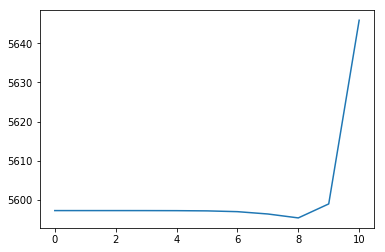

In [60]:
plotData(errors)

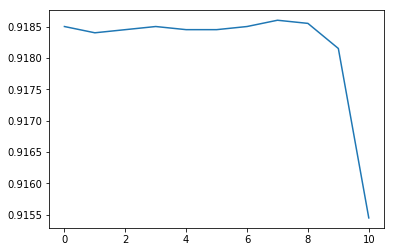

In [61]:
plotData(allAcc)

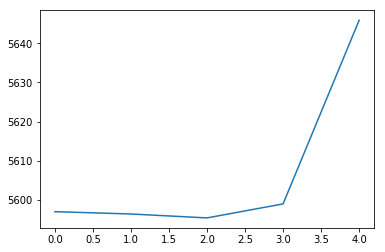

In [62]:
plotData(errors[6:])

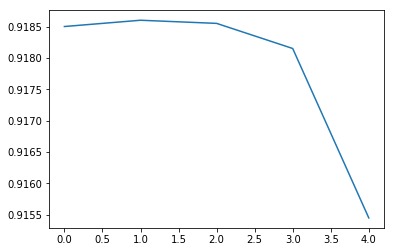

In [63]:
plotData(allAcc[6:])